0 [-0.1039464] [0.17350323]


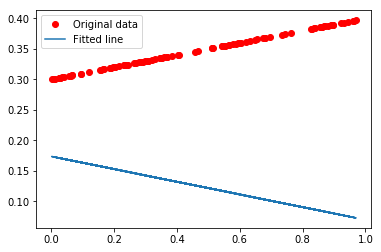

400 [0.09999904] [0.3000005]


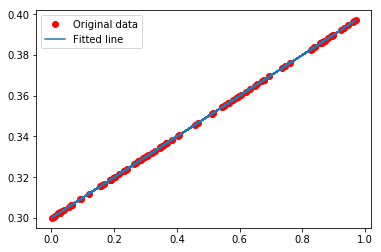

800 [0.09999975] [0.30000016]


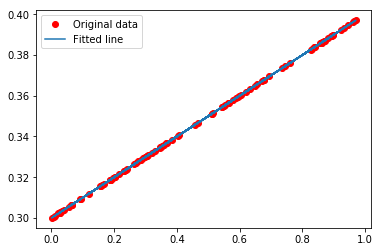

1200 [0.09999975] [0.30000016]


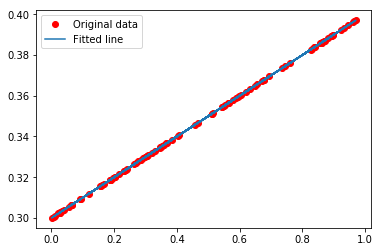

1600 [0.09999975] [0.30000016]


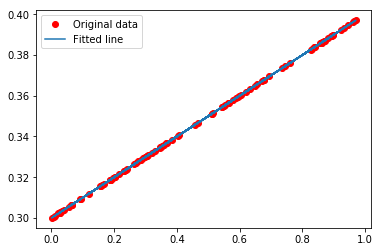

2000 [0.09999975] [0.30000016]


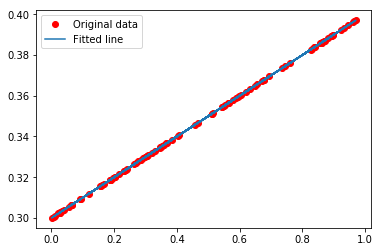

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Random 100 points by numpy
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.) 
# Use tensorflow to find weighting of fitting

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(2001):
    sess.run(train)
    if step % 400 == 0:
        print(step, sess.run(W), sess.run(b))
        plt.plot(x_data, y_data, 'ro', label='Original data')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

# Learns best fit is W: [0.1], b: [0.3]